# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import json
import os
import requests
import tweepy
import re

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Read CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Create a folder if it does not already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Download TSV file from URL using Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# Check the status
response

<Response [200]>

In [5]:
# Open and write file to TSV file in binary
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

# Read TSV file
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
# Overview the result
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
# Refer to https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""
bearer_token = ""

# Create an instance
client = tweepy.Client(
    consumer_key=consumer_key,
    consumer_secret=consumer_secret,
    access_token=access_token,
    access_token_secret=access_secret,
    bearer_token=bearer_token,
    wait_on_rate_limit=True
)

In [28]:
# For loop which will add each available tweet to a new line of tweet-json.txt
with open('tweet_json.txt', 'w') as file:
    # Loop through each tweet_id
    for tweet_id in twitter_archive.tweet_id:
        temp = {}
        # Get information on each tweet
        tweet = client.get_tweet(tweet_id, tweet_fields=['public_metrics', 'created_at', 'geo'])
        
        if tweet.data:
            # Make sure the fields exist for the tweet
            for key in tweet.data:
                # public_metrics returns a dict, so a different treatment given
                if key == 'public_metrics':
                    for k, v in tweet.data[key].items():
                        # Store key-value pairs in temp
                        temp[k] = v
                else:
                    temp[key] = str(tweet.data[key])
        json.dump(temp, file)
        file.write('\n')

Rate limit exceeded. Sleeping for 842 seconds.
Rate limit exceeded. Sleeping for 843 seconds.
Rate limit exceeded. Sleeping for 843 seconds.
Rate limit exceeded. Sleeping for 842 seconds.
Rate limit exceeded. Sleeping for 842 seconds.
Rate limit exceeded. Sleeping for 844 seconds.
Rate limit exceeded. Sleeping for 844 seconds.


In [604]:
# Convert tweet_jason.txt into a pandas Dataframe
df_list = []
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append(json.loads(line))

df_tweet = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'like_count'])
df_tweet.rename(columns= {"id":"tweet_id", "like_count":"favorite_count"}, inplace=True)


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assesment
For further investigations, we first view each of data sets `twitter_archive`, `image_prediction`, and `df_tweet`.

In [605]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [606]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1030,745433870967832576,NaN,NaN,2016-06-22 01:50:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lenox. She's in a wheelbarrow. Silly doggo. You don't belong there. 10/10 would push around https://t.co/oYbVR4nBsR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/745433870967832576/photo/1,https://twitter.com/dog_rates/status/745433870967832576/photo/1,https://twitter.com/dog_rates/status/745433870967832576/photo/1",10,10,Lenox,doggo,None,None,None
626,795076730285391872,NaN,NaN,2016-11-06 01:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bailey. She loves going down slides but is very bad at it. Still 11/10 https://t.co/ivPWhspN3E,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1",11,10,Bailey,None,None,None,None
731,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Combo. The daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/LOKrNo0OM7,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,None,None,None
826,769335591808995329,NaN,NaN,2016-08-27 00:47:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Ever seen a dog pet another dog? Both 13/10 truly an awe-inspiring scene. (Vid by @mdougherty20) https://t.co/3PoKf6cw7f,7.069045e+17,4.196984e+09,2016-03-07 18:09:06 +0000,"https://vine.co/v/iXQAm5Lrgrh,https://vine.co/v/iXQAm5Lrgrh",13,10,None,None,None,None,None
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kulet. She's very proud of the flower she picked. Loves it dearly. 10/10 now I want a flower https://t.co/myUUwqJIs7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701129875456/photo/1,10,10,Kulet,None,None,None,None
1713,680473011644985345,NaN,NaN,2015-12-25 19:39:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Hector. He thinks he's a hammer. Silly Hector. You're a pupper, not a hammer. 10/10 https://t.co/OdUFuZIXiI",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680473011644985345/photo/1,10,10,Hector,None,None,pupper,None
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666447344410484738/photo/1,9,10,Scout,None,None,None,None
226,848690551926992896,NaN,NaN,2017-04-03 00:16:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending in animals other than dogs. We only rate dogs. Not Furry Ecuadorian Sea Turtles. Thank you... 12/10 https://t.co/UOE79zb6VU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848690551926992896/photo/1,12,10,None,None,None,None,None
1566,687841446767013888,NaN,NaN,2016-01-15 03:39:15 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",13/10 I can't stop watching this (vid by @k8lynwright) https://t.co/nZhhMRr5Hp,NaN,NaN,NaN,https://vine.co/v/iOWwUPH1hrw,13,10,None,None,None,None,None
114,870656317836468226,NaN,NaN,2017-06-02 15:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cody. He zoomed too aggressively and tore his ACL. Happens to the bes

In [607]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [608]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6818.0,32640.0
1,892177421306343426,5131.0,28214.0
2,891815181378084864,3390.0,21177.0
3,891689557279858688,7032.0,35585.0
4,891327558926688256,7547.0,33985.0
...,...,...,...
2351,666049248165822465,36.0,85.0
2352,666044226329800704,111.0,241.0
2353,666033412701032449,35.0,97.0
2354,666029285002620928,39.0,110.0


### Programmatic assesments
We analyze various aspects of each data set for detecting issues.

In [609]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- The columns `in_reply_to__status_id`, `in_reply_to__user_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` are related to replies and retweets, therefore not relevant. 
Moreover, some of them are set to be of `float64` unlike `tweet_id`.
- The data in `timestamp` is valued in `object`.
- The rating values are defined by computing both numerators and denominators, respectively. 
- Dog stages are assigned in separate columns.

In [610]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- The predictions are classified in 3 groups `p1`, `p2`, and `p3`.

In [611]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2326 non-null   object 
 1   retweet_count   2326 non-null   float64
 2   favorite_count  2326 non-null   float64
dtypes: float64(2), object(1)
memory usage: 55.3+ KB


- The `tweet_id` is valued in `object`.
- The `retweet_count` and `favorite_count`, which count the numbers of retweets and favorites, take valued in `float64`.

In [612]:
# Check the duplicate rows in each dataset.
assert [twitter_archive.duplicated() == False]
assert [image_prediction.duplicated() == False]
assert [df_tweet.duplicated() == False]

In [613]:
# Check there is no duplicate tweet id.
twitter_archive.tweet_id.duplicated().sum()

0

In [618]:
# Check the number of raws with missing data in any of doggo, floofer, pupper, and puppo.
not_dogs = (twitter_archive.doggo=='None') & (twitter_archive.floofer=='None') & (twitter_archive.pupper=='None') & (twitter_archive.puppo=='None')

len(twitter_archive[not_dogs])

1976

In [80]:
# Check if each tweet belongs to either doggo, floofer, pupper, or puppo.
dog_names = ['doggo', 'floofer', 'pupper', 'puppo']
dog_sum = 0
for dog in dog_names:
    dog_sum += twitter_archive[dog].value_counts()[1]
dog_sum

394

In [619]:
# Check what names are given in name column
names = list(twitter_archive.name.unique())
names = sorted(names, reverse=True)
for i in range(4):
    print(names[10*i:10*(i+1)])

['very', 'unacceptable', 'this', 'the', 'such', 'space', 'quite', 'one', 'old', 'officially']
['not', 'my', 'mad', 'light', 'life', 'just', 'infuriating', 'incredibly', 'his', 'getting']
['by', 'an', 'all', 'actually', 'a', 'Zuzu', 'Zooey', 'Zoey', 'Zoe', 'Ziva']
['Zeus', 'Zeke', 'Zeek', 'Zara', 'Yukon', 'Yogi', 'Yoda', 'Wyatt', 'Wishes', 'Winston']


In [620]:
# Check the data type in timestamp
type(twitter_archive.timestamp[0])

str

In [131]:
# Check what kind of values are given in rating_denominator
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [621]:
# Show rows whose rating denominators are not valued to 10.
pd.set_option('display.max_colwidth', 30)
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.co...",@jonnysun @Lin_Manuel ok j...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.co...",@docmisterio account start...,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.co...",The floofs have been relea...,NaN,NaN,NaN,https://twitter.com/dog_ra...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.co...",Meet Sam. She smiles 24/7 ...,NaN,NaN,NaN,https://www.gofundme.com/s...,24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.co...",RT @dog_rates: After so ma...,7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_ra...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.co...",Why does this never happen...,NaN,NaN,NaN,https://twitter.com/dog_ra...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.co...","After so many requests, th...",NaN,NaN,NaN,https://twitter.com/dog_ra...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.co...",Say hello to this unbeliev...,NaN,NaN,NaN,https://twitter.com/dog_ra...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.co...",Happy 4/20 from the squad!...,NaN,NaN,NaN,https://twitter.com/dog_ra...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.co...",This is Bluebert. He just ...,NaN,NaN,NaN,https://twitter.com/dog_ra...,50,50,Bluebert,None,None,None,None


In [622]:
# Show texts whose rating denominators are not valued to 10.
pd.set_option('display.max_colwidth', -1)
twitter_archive[twitter_archive.rating_denominator != 10].text

/var/folders/nd/vp96tnz10qg2jfdql1_4_wk00000gn/T/ipykernel_78879/2462828316.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

In [623]:
# Check what kind of values are given in rating_numerator
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [624]:
# Investigate values in img_num
print(image_prediction.img_num.unique())
image_prediction.img_num.value_counts()

[1 4 2 3]


1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [625]:
# Check duplicates data in image_prediction
sum(image_prediction.jpg_url.duplicated())

66

In [626]:
# Check the number of rows without tweet_id
df_tweet.tweet_id.isnull().sum()

30

In [603]:
# Visualize the rows without tweet_id
df_tweet[df_tweet.tweet_id.isnull()]

,tweet_id,retweet_count,favorite_count
19,NaN,NaN,NaN
78,NaN,NaN,NaN
95,NaN,NaN,NaN
101,NaN,NaN,NaN
104,NaN,NaN,NaN
118,NaN,NaN,NaN
132,NaN,NaN,NaN
155,NaN,NaN,NaN
182,NaN,NaN,NaN
185,NaN,NaN,NaN


- The rows in `df_tweet` without values in `tweet_id` are empty.

### Quality issues (Q)

1. `twitter_archive`: There are missing data in the dog stages.

2. `twitter_archive`: Retweets are included.

3. `twitter_archive`: Replies are included.

4. `twitter_archive`: The columns `in_reply_to__status_id`, `in_reply_to__user_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` are related to replies and retweets. 

5. `twitter_archive`: The data in `source` have HTML tags.

6. `twitter_archive`: The data type of the `timestamp` column is string. Every data ends with `+0000`, which is redundant.

7. `twitter_archive`: As for the column `name`, wrong names, e.g. `a`, `very`, and `such`, are given.

8. `twitter_archive`: There are unusual values in the columns `rating_numerators` (e.g. 204) and `rating_denominator` (not 10).

9. `twitter_archive`: - There may be wrong rating values due to the presence of a few fractional expressions like $a/b$ in the texts.

10. `image_prediction`: Some rows have take `False` in any of `p1`, `p2`, and `p3` and thus are not classified as dogs.

11. `image_prediction`: The `img_num` corresponds to the label of images used for predictions per row. After the predictions, it seems unnecessary.

12. `image_prediction`: Some dog breeds are not capitalized.

13. `df_tweet`: The datatype of `tweet_id` is string.

14. `df_tweet`: The counting numbers of retweets and favorites are defined as `float`.

### Tidiness issues (T)
1. `twitter_archive`: Dog stages are given in different columns.

2. `twitter_archive`: The values of rating consist of two columns `rating_numerator` and `rating_denominator`, respectively.

3. `image_prediction`: There are multiple columns for predictions `p1`, `p2`, `p3`.

4. `twitter_archive` and `image_prediction`: The `image_prediction` is separate from `twitter_archive`.
5. `twitter_archive` and `df_tweet`: The `df_tweet` is currently separate from `twitter_archive`.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 
Qualitiy issues are labeled as **(Q)** whereas tidiness issues are denoted by **(T)**.

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [713]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
df_tweet_clean = df_tweet.copy()

### Issue #1 (T):
- (`twitter_archive`) Dog stages are given in different columns.

#### Define:
- We integrate them into a new column `dog_stage`.

#### Code:

In [714]:
# Combine the dog stage columns into a new one 'dog_stage'
dog_stages =['doggo', 'floofer', 'pupper', 'puppo']

# Initialige every entry to be "None"
twitter_archive_clean["dog_stage"] =  "None"

# Loop through all the rows to replace initial values with non-trivial ones from the dog stage columns.
for idx in range(len(twitter_archive_clean)):
     for dog_stage in dog_stages:
         if (twitter_archive_clean[dog_stage][idx] == dog_stage):
             twitter_archive_clean.loc[idx, "dog_stage"] = dog_stage

# Remove the columns of dog stages.
twitter_archive_clean = twitter_archive_clean.drop(dog_stages, axis = 1)

#### Test: 
- A new column `dog_stage` is created and three previous columns are dropped.

In [715]:
# Overview the result
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

In [716]:
# Check the values in dog_stage.
twitter_archive_clean.dog_stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Issue #2 (Q): 
- (`twitter_archive`) There are missing data in the dog_stage column.

#### Define:
- We extract the data for dog stages from the texts, and try to impute them into the `dog_stage` column.

#### Code
- We investigate rows that have `None` in every dog stage column and try to find dog stages from their texts.

In [717]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
# Make a dictionary to store a pair of the row index and dog stage
idx_dog_stage = {}

# Loop through all the rows with 'None' in the dog_stage column to see if any dog stage can be extracted from each text.
for idx in range(len(twitter_archive_clean)):
    if (twitter_archive_clean.loc[idx, "dog_stage"] == 'None'):
        texts = twitter_archive_clean["text"][idx].lower().split()
        for dog_stage in dog_stages:
            if (dog_stage in texts):
                idx_dog_stage[idx] = dog_stage

len(idx_dog_stage)

0

No extra information was found in this analysis.

#### Test:
It follows from the above result that we **could not** impute any missing dog stage using the text data.

In [718]:
assert idx_dog_stage == {}

In [719]:
twitter_archive_clean.dog_stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [720]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

### Issue #3 (Q):
- (`twitter_archive`) Retweets are included. Their texts begin with `RT`.

#### Define:
- We identify rows with texts starting from RT and remove them.
- We drop rows with non-trivial values in `retweeted_status_id`.

#### Code

In [721]:
# Make a list that stores indices for retweet rows
retweet_idx = []

# Loop through all the rows to detect whether RT is included in each text
for idx in range(len(twitter_archive_clean)):
    if (twitter_archive_clean.loc[idx, 'text'][:2] == 'RT'):
        retweet_idx.append(idx)

# Drop rows including retweets
twitter_archive_clean = twitter_archive_clean.drop(retweet_idx)

# Reset row indices
twitter_archive_clean.reset_index(drop=True, inplace=True)

# Alternatively, we delete rows with non-trivial values in `retweeted_status_id` as below.
# twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test
- We now see that there is no retweet in the dataset. 
- We confirm that `retweeted_status_id` has 0 non-null data.

In [722]:
temp = []
for idx in range(len(twitter_archive_clean)):
    if (twitter_archive_clean.loc[idx, 'text'][:2] == 'RT'):
        temp.append(idx)
temp

[]

In [639]:
twitter_archive_clean.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2173 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2173 non-null   object 
 4   source                      2173 non-null   object 
 5   text                        2173 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2115 non-null   object 
 10  rating_numerator            2173 non-null   int64  
 11  rating_denominator          2173 non-null   int64  
 12  name                        2173 non-null   object 
 13  dog_stage                   2173 

### Issue #4 (Q):
- (`twitter_archive`) Replies are included.

#### Define:
- We remove rows wtih non-trivial values in `in_reply_to_status_id`.

#### Code

In [723]:
# Remove rows with non-null values in in_reply_to_status_id
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

#### Test
- We see that `in_reply_to_status_id` contains only `nan` value.

In [724]:
twitter_archive_clean.in_reply_to_status_id.unique()

array([nan])

In [725]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2172
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2095 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2095 non-null   object 
 4   source                      2095 non-null   object 
 5   text                        2095 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2092 non-null   object 
 10  rating_numerator            2095 non-null   int64  
 11  rating_denominator          2095 non-null   int64  
 12  name                        2095 non-null   object 
 13  dog_stage                   2095 

### Issue #5 (Q): 
- (`twitter_archive`) The columns `in_reply_to__status_id`, `in_reply_to__user_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` are related to replies and retweets, therefore no longer needed.

#### Define:
- We remove all the columns given above.

#### Code

In [726]:
# Drop columns related to replies and retweets.
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                    'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True, axis=1)
# Reset Index
twitter_archive_clean.reset_index(drop=True, inplace=True)

#### Test

In [727]:
# Overview of the dataset
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2095 non-null   int64 
 1   timestamp           2095 non-null   object
 2   source              2095 non-null   object
 3   text                2095 non-null   object
 4   expanded_urls       2092 non-null   object
 5   rating_numerator    2095 non-null   int64 
 6   rating_denominator  2095 non-null   int64 
 7   name                2095 non-null   object
 8   dog_stage           2095 non-null   object
dtypes: int64(3), object(6)
memory usage: 147.4+ KB


### Issue #6 (Q): 
- (`twitter_archive`) The data in `source` have HTML tags.

#### Define:
- We remove the HTML tags from the URLs using regular expressions.

#### Code

In [728]:
# Define a regex pattern to extract URLs from links
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)'

# Create a new column to store URLs
twitter_archive_clean['url'] = twitter_archive_clean['source'].str.extract(pattern)

# Drop `source` column
twitter_archive_clean.drop(columns=['source'], inplace=True)

#### Test
- We see that there is no `source` column and a new column including URLs has been created.

In [729]:
assert not 'source' in twitter_archive_clean.columns

twitter_archive_clean['url'].unique()

array(['http://twitter.com/download/iphone', 'http://twitter.com',
       'http://vine.co', 'https://about.twitter.com/products/tweetdeck'],
      dtype=object)

### Issue #7 (Q): 
- (`twitter_archive`): The data type of the `timestamp` column is string. Every timestamp ends with `+0000`, which is redundant.

#### Define
- We remove `+0000` from each timestamp.
- We need to convert the data type into `datetime`.

#### Code

In [734]:
# Check how to take a string slice properly.
print(twitter_archive_clean.timestamp[0])
print(twitter_archive_clean.timestamp[0][:-6])

2017-08-01 16:23:56 +0000
2017-08-01 16:23:56


In [735]:
# Truncate the timestamp by removing the midnight UTC.
twitter_archive_clean["timestamp"] = twitter_archive_clean["timestamp"].str[:-6]

# Convert the string data into the datetime.
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])

#### Test
- Below we see that the data type has been converted into the datetime.

In [739]:
# Look at several entries and their data types
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #8 (Q):
- (`twitter_archive`): As for `name`, wrong names, e.g. `a`, `very`, and `such`, are given.

#### Define
- We inspect the rows with names in **lower case** to see if we can extract correct names out of the texts. 

#### Code

In [740]:
# Extract only the names in lower case.
names = twitter_archive_clean.name.unique()
wrong_names = [name for name in names if name.islower()]

# Store an index list of rows with wrong names
wrong_name_idx = []

# For loop to extract the corresponding indices to the rows with wrong names
for idx in range(len(twitter_archive_clean)):
    if twitter_archive_clean.loc[idx, 'name'] in wrong_names:
        wrong_name_idx.append(idx)
        
# View the texts to find proper names
for idx in wrong_name_idx:
    print(f"Index: {idx}" + "\n" + f"{twitter_archive_clean.loc[idx, 'text']}" + "\n")


Index: 21
I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba

Index: 51
Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF

Index: 141
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9

Index: 156
Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x

Index: 263
There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7

Index: 289
Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK

Index: 424
We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustra

In [741]:
# We looked at the above results using a text editor in detail.
# Make a dictionary to store a pair of indices and new names found from the texts.
# In 1991, we found Jessiga, which was rewritten as Jessica.
# In 2131, we found Johm, which was rewritten as John.

# Store pairs of new names and corresponding names in a dictionary.
idx_name_dict = {657:"Zoey", 783:"Quizno", 1609:"Wylie", 1781:"Jacob", 
                 1811:"Rufus", 1861:"Spork", 1870:"Cherokee", 1873:"Hemry", 
                 1891:"Alphred", 1905:"Alfredo", 1933:"Leroi", 1946:"Berta", 
                 1960:"Chuk", 1977:"Alfonso", 1991:"Cheryl", 1997:"Jessica", 
                 2004:"Klint", 2013:"Kohl", 2043:"Pepe", 2050:"Octaviath",
                 2053:"John"
                 }

# Replace wrong names with the above correct names 
# For the rows, where no correct names were found, set "None".

for idx in wrong_name_idx:
    twitter_archive_clean.loc[idx, "name"] = "None"
    
for key, value in idx_name_dict.items():
    twitter_archive_clean.loc[key, "name"] = value


#### Test
- Below we confirm that wrong names were set to "None" and proper names were imputed into some rows.

In [742]:
twitter_archive_clean.loc[wrong_name_idx, "name"].value_counts()

None         83
Zoey         1 
Octaviath    1 
Pepe         1 
Kohl         1 
Klint        1 
Jessica      1 
Cheryl       1 
Alfonso      1 
Chuk         1 
Berta        1 
Leroi        1 
Alfredo      1 
Alphred      1 
Hemry        1 
Cherokee     1 
Spork        1 
Rufus        1 
Jacob        1 
Wylie        1 
Quizno       1 
John         1 
Name: name, dtype: int64

### Issue #9 (Q):
- (`twitter_archive`): There are unusual values in the columns `rating_numerators` (e.g. 204) and `rating_denominator` (not 10).

#### Define
- We investigate the texts to see if we can fix the values in `rating_numerator` and `rating_denominator`.

#### Code

In [743]:
# Define a sub dataframe with unusual values in rating_denominator
sub_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

# Maximize the display range
pd.set_option('display.max_colwidth', -1)

sub_clean[['text', 'rating_numerator', 'rating_denominator']]

/var/folders/nd/vp96tnz10qg2jfdql1_4_wk00000gn/T/ipykernel_78879/3832170080.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,text,rating_numerator,rating_denominator
339,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
403,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
700,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
853,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
904,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
948,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1011,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1036,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1056,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [744]:
# Make a dictionary that stores pairs of correct denominator values and corresponding indices.
idx_rating_dict = {853:[14, 10], 948:[13, 10], 985: [11, 10], 1425: [10, 10], 2074:[9, 10]}

for key, values in idx_rating_dict.items():
    twitter_archive_clean.loc[key, "rating_numerator"] = values[0]
    twitter_archive_clean.loc[key, "rating_denominator"] = values[1]
    
# Reset row index
twitter_archive_clean.reset_index(drop=True, inplace=True)

#### Test
- We check unusual values for the ratings and see that some of them were replaced with correct values.

In [745]:
# Check the rows with unusual ratings
sub_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

# Maximize the display range
pd.set_option('display.max_colwidth', -1)

sub_clean[['text', 'rating_numerator', 'rating_denominator']]


/var/folders/nd/vp96tnz10qg2jfdql1_4_wk00000gn/T/ipykernel_78879/3761480327.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,text,rating_numerator,rating_denominator
339,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
403,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
700,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
904,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1011,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1036,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1056,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1128,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1209,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1398,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110


### Issue #10: (`twitter_archive`)
- There may be wrong rating values due to the presence of a few fractional expressions like $a/b$ in the texts.

#### Define
- We see the texts to see if we can fix the values in ratings. 
- In case multiple scores are given because of evaluating multiple dogs shown in a picture, we adopt higher scores (There would be a few possibilities of dealing with this issue).

#### Code

In [746]:
# Make a list including indices of rows whose texts include multiple fractional expressions.
idx_multiple_frac_list = []

# Find a/b from the texts using regular expressions
for idx in range(len(twitter_archive_clean)):
    rating = re.findall("-?\d+/\d+", twitter_archive_clean.loc[idx, "text"])

    # Store the indices corresponding to rows with texts including multiple fractional expressions.
    if(len(rating) != 1):
        idx_multiple_frac_list.append(idx)

# Show pairs of indices, current ratings, and texts. Check if the current ratings are properly given.
for idx in idx_multiple_frac_list:
    print("Index:", idx, ", Current Rating:", twitter_archive_clean.loc[idx, "rating_numerator"], "/", twitter_archive_clean.loc[idx, "rating_denominator"], "\n", twitter_archive_clean.loc[idx, "text"], "\n")

Index: 588 , Current Rating: 12 / 10 
 "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ 

Index: 797 , Current Rating: 10 / 10 
 This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ 

Index: 853 , Current Rating: 14 / 10 
 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 

Index: 948 , Current Rating: 13 / 10 
 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 

Index: 985 , Current Rating: 11 / 10 
 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 

Index: 1005 , Current Rating: 10 / 10 
 Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE 

Index: 1135 , Current Rating: 9 / 10 
 T

In [747]:
# Make a dictionary storing pairs of correct numerator and denominator values, and corresponding indices.
idx_rating_dict = {1233:[13, 10], 1277:[10, 10], 1555:[11, 10], 
                   1591:[10, 10], 1651:[8, 10], 2012:[8, 10]}

for key, values in idx_rating_dict.items():
    twitter_archive_clean.loc[key, "rating_numerator"] = values[0]
    twitter_archive_clean.loc[key, "rating_denominator"] = values[1]

In [748]:
# Check the details in a text editor.
for idx in idx_multiple_frac_list:
    print("Index:", idx, ", Current Rating:", twitter_archive_clean.loc[idx, "rating_numerator"], "/", twitter_archive_clean.loc[idx, "rating_denominator"], "\n", twitter_archive_clean.loc[idx, "text"], "\n")

Index: 588 , Current Rating: 12 / 10 
 "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ 

Index: 797 , Current Rating: 10 / 10 
 This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ 

Index: 853 , Current Rating: 14 / 10 
 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 

Index: 948 , Current Rating: 13 / 10 
 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 

Index: 985 , Current Rating: 11 / 10 
 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 

Index: 1005 , Current Rating: 10 / 10 
 Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE 

Index: 1135 , Current Rating: 9 / 10 
 T

### Issue #11 (T):
- (`twitter_archive`): The values of rating consist of two columns `rating_numerator` and `rating_denominator`, respectively.

#### Define
- We compute `(numerator)/(denominator)` per row and create a new column `rating`.

In [749]:
# Define a new column by diviging `rating_numerator` by `rating_denominator`
twitter_archive_clean["rating"] = twitter_archive_clean["rating_numerator"] / twitter_archive_clean["rating_denominator"]

# Drop the columns for rating numerator and denominator.
twitter_archive_clean.drop("rating_denominator", axis = 1, inplace=True)
twitter_archive_clean.drop("rating_numerator", axis = 1, inplace=True)

#### Test

In [750]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2095 non-null   int64         
 1   timestamp      2095 non-null   datetime64[ns]
 2   text           2095 non-null   object        
 3   expanded_urls  2092 non-null   object        
 4   name           2095 non-null   object        
 5   dog_stage      2095 non-null   object        
 6   url            2095 non-null   object        
 7   rating         2095 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 131.1+ KB


### Issue #12 (Q):
- (`image_prediction`): Some rows have take `False` in any of `p1`, `p2`, and `p3` and thus are not classified as dogs.

#### Define
- We drop rows with `False` in all of `p1_dog`, `p2_dog`, and `p3_dog`.

#### Code

In [759]:
# Create a mask with False in p_dog dolumns
dog_filter = (image_prediction_clean.p1_dog == False) & (image_prediction_clean.p2_dog == False) & (image_prediction_clean.p3_dog == False)

# Filter the data set by a mask
image_prediction_clean = image_prediction_clean[~dog_filter]

# Reset row index
image_prediction_clean.reset_index(drop=True, inplace=True)

#### Test

In [760]:
image_prediction_clean[dog_filter]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #13 (Q):
- (`image_prediction`) The `img_num` corresponds to the label of images used for predictions per row. After the predictions, it seems unnecessary.

#### Define
- We drop the column `img_num`.

#### Code

In [761]:
# Drop the img_num column.
image_prediction_clean.drop('img_num', axis=1, inplace=True)

#### Test

In [762]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   p1        1751 non-null   object 
 3   p1_conf   1751 non-null   float64
 4   p1_dog    1751 non-null   bool   
 5   p2        1751 non-null   object 
 6   p2_conf   1751 non-null   float64
 7   p2_dog    1751 non-null   bool   
 8   p3        1751 non-null   object 
 9   p3_conf   1751 non-null   float64
 10  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 114.7+ KB


### Issue #14 (T):
- (`image_prediction`): There are multiple columns for predictions `p1`, `p2`, `p3`.

#### Define
-  We adopt only one prediction with the highest confidence value and the corresponding dog breed.
- We create new columns `confidence` and `dog_breed`

#### Code

In [764]:
# Create lists that stores a pair of the most likely prediction for dogs and the corresponding a breed of dogs
dog_breed_list = []
confidence_list = []

# Loop through all the rows to pick up the dog breeds associated with the most likely dog predictions
for idx in range(len(image_prediction_clean)):
    if image_prediction_clean.loc[idx, 'p1_dog'] == True:
        dog_breed_list.append(image_prediction_clean.loc[idx, 'p1'])
        confidence_list.append(image_prediction_clean.loc[idx, 'p1_conf'])
        continue
    
    elif image_prediction_clean.loc[idx, 'p2_dog'] == True:
        dog_breed_list.append(image_prediction_clean.loc[idx, 'p2'])
        confidence_list.append(image_prediction_clean.loc[idx, 'p2_conf'])
        continue
    
    elif image_prediction_clean.loc[idx, 'p3_dog'] == True:
        dog_breed_list.append(image_prediction_clean.loc[idx, 'p3'])
        confidence_list.append(image_prediction_clean.loc[idx, 'p3_conf'])

# Create new column `dog_breed` and `confidence`
for idx in range(len(image_prediction_clean)):
    image_prediction_clean['dog_breed'] = dog_breed_list
    image_prediction_clean['confidence'] = confidence_list

# Drop all the previous columns for predictions    
image_prediction_clean.drop(['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf'], axis=1, inplace=True)


#### Test

In [765]:
image_prediction_clean.head()

,tweet_id,jpg_url,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [766]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   int64  
 1   jpg_url     1751 non-null   object 
 2   dog_breed   1751 non-null   object 
 3   confidence  1751 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 54.8+ KB


### Issue #15 (Q):
- (`image_prediction`): Some dog breeds are not capitalized.

#### Define
- We capitalize the breeds of dogsfor consistent conventions.

#### Code

In [767]:
# Convert the dog breeds to be capitalized
image_prediction_clean.dog_breed = image_prediction_clean.dog_breed.str.capitalize()

#### Test

In [768]:
image_prediction_clean.dog_breed.head()

0    Welsh_springer_spaniel
1    Redbone               
2    German_shepherd       
3    Rhodesian_ridgeback   
4    Miniature_pinscher    
Name: dog_breed, dtype: object

### Issue #16 (T):
- (`twitter_archive` and `image_prediction`): The `image_prediction` is separate from `twitter_archive`.

#### Define
- We combine the `image_prediction` into `twitter_archive` in terms of `tweet_id`.
- When merging both dataframes, for consistency, we keep the rows having image URLs and thus drop the rows with null values in `jpg_url`.

#### Code

In [769]:
# Join the data frames w.r.t tweet_id
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean, on = ['tweet_id'], how = 'left')

In [770]:
# Create a mask filtering rows without image URLs
mask = twitter_archive_clean.jpg_url.isnull()

# Filter rows using the above mask
twitter_archive_clean = twitter_archive_clean[~mask]

#### Test
- We check that every row takes non-trivial values in `jpg_url`.

In [771]:
# Check the number of rows without jpg_url.
twitter_archive_clean.jpg_url.isnull().sum()

0

In [773]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 1 to 2094
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       1665 non-null   int64         
 1   timestamp      1665 non-null   datetime64[ns]
 2   text           1665 non-null   object        
 3   expanded_urls  1665 non-null   object        
 4   name           1665 non-null   object        
 5   dog_stage      1665 non-null   object        
 6   url            1665 non-null   object        
 7   rating         1665 non-null   float64       
 8   jpg_url        1665 non-null   object        
 9   dog_breed      1665 non-null   object        
 10  confidence     1665 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 156.1+ KB


### Issue #17 (Q)
- (`df_tweet`): The datatype of `tweet_id` is string.

#### Define
- We convert the data type of `tweet_id` into `int`.

#### Code

In [774]:
# Create a mask to filter out rows without tweet_id
mask = df_tweet_clean.tweet_id.isnull()

# Apply the filter to drop rows without tweet_id
df_tweet_clean = df_tweet_clean[~mask]

# Change the datatype of twee_id into integer for merging the data sets
df_tweet_clean["tweet_id"] = df_tweet_clean['tweet_id'].astype("int")

#### Test

In [775]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2326 non-null   int64  
 1   retweet_count   2326 non-null   float64
 2   favorite_count  2326 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 72.7 KB


### Issue #18 (Q)
- (`df_tweet`): The counting numbers of retweets and favorites are defined as `float`.

#### Define
- We convert those columns into `int`.

#### Code

In [791]:
# Change the datatypes of retweet_count and favorite_count int for consistency.
df_tweet_clean["retweet_count"] = df_tweet_clean['retweet_count'].astype("int")
df_tweet_clean["favorite_count"] = df_tweet_clean['favorite_count'].astype("int")

#### Test

In [792]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 72.7 KB


### Issue #19 (T):
-  (`twitter_archive` and `df_tweet`): The `df_tweet` is currently separate from `twitter_archive`.

#### Define
- The `df_tweet` is added to `twitter_archive` in terms of `tweet_id`.

#### Code

In [778]:
# Merge df_tweet into twitter_archive w.r.t. tweet_id
twitter_archive_clean = pd.merge(twitter_archive_clean, df_tweet_clean,
                            on = ['tweet_id'], how = 'left')

#### Test

In [779]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1664
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1665 non-null   int64         
 1   timestamp       1665 non-null   datetime64[ns]
 2   text            1665 non-null   object        
 3   expanded_urls   1665 non-null   object        
 4   name            1665 non-null   object        
 5   dog_stage       1665 non-null   object        
 6   url             1665 non-null   object        
 7   rating          1665 non-null   float64       
 8   jpg_url         1665 non-null   object        
 9   dog_breed       1665 non-null   object        
 10  confidence      1665 non-null   float64       
 11  retweet_count   1657 non-null   float64       
 12  favorite_count  1657 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 182.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [788]:
# Save the cleaned dataframe in a CSV format
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

# Load the CSV file
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Motivations:
We focus on the following three factors extracted from each three separate dataframes and investigate their correlations by using the merged dataframe and the visualization thereof.

1. Rating values

2. Dog stages

3. Predicted dog breeds

3. The number of retweets and favorites

Note that there are None' and NaN's in the columns of dog_stage, retweet_count, and favorite_count. When computing the ranking of dog stages and dog breeds, those tweets are not considered due to the lack of the data.

### Insights:
All the above considered, we pose the following insights into the whole data:

1. How is the distribution of the dog stages in the dataset? Which one occupies the largest proportion (apart from `None`)?

2. What dog breeds take a larger number of tweets/retweets/favorites?

3. How is the statistics of rating scores?

### 1. Ditributions of dog stages

In [1005]:
# Dog stage and count
dog_stage_count = df.dog_stage.value_counts(normalize=True)
dog_stage_count

None       0.845646
pupper     0.103904
doggo      0.032432
puppo      0.013213
floofer    0.004805
Name: dog_stage, dtype: float64

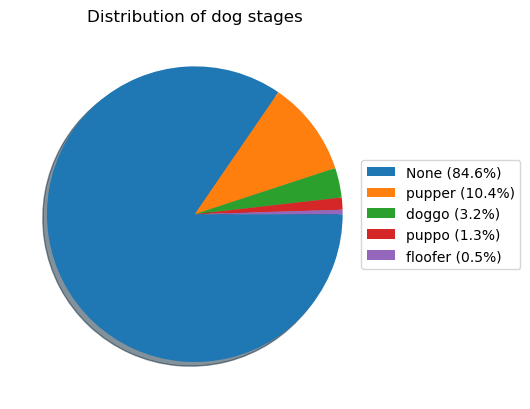

In [ ]:
# Plot the distribution of dog stages in a pie chart
labels = dog_stage_count.index
counts = dog_stage_count.values
legends = ['{} ({:.1%})'.format(label, pct) for label, pct in zip(labels, counts)]
plt.pie(values, radius=1.0, shadow=True, counterclock=False, autopct=None)
plt.legend(legends, bbox_to_anchor=(1.4,0.5), loc="right")
plt.title('Distribution of dog stages');

According to the pie chart above, while most rows take `None` value in the `dog_stage`, the `pupper` appears the most frequently among the tweets. However, as long as there are many missing data in the `dog_stage` column, more detail studies might lead to different results.

### 2. Correlations of dog breeds with tweets, retweets and favorites

In [ ]:
# Dog breed and count
dog_breed_tweet = df.dog_breed.value_counts().reset_index()
dog_breed_tweet.columns = ['dog_breed', 'tweet_count']

In [1097]:
df.dog_breed.value_counts(normalize=True)

Golden_retriever      0.093694
Labrador_retriever    0.063664
Pembroke              0.056456
Chihuahua             0.054054
Pug                   0.037237
                        ...   
Entlebucher           0.000601
Japanese_spaniel      0.000601
Standard_schnauzer    0.000601
Silky_terrier         0.000601
Irish_wolfhound       0.000601
Name: dog_breed, Length: 113, dtype: float64

The above dataframe shows that the dog breeds are more complex than the dog stages and there is no particular dominant breed in the dataset. Therefore, we do not plot the chart for the distribution of all the dog breeds. Instead, we restrict them only to the top 10 breeds. Below the bar plot is given:

In [1117]:
# Sum up the retweet_count and favorite_count by dog breeds, respectively
# Combine the result with the dog_breed_tweet w.r.t. dog_breed
# Create a new column summing the retweet and favorite counts
dog_breed_refav = df.groupby(['dog_breed'])[['retweet_count', 'favorite_count']].sum()
dog_breed_count = pd.merge(dog_breed_tweet, dog_breed_refav, on='dog_breed')


dog_breed_count['citation'] = dog_breed_count['retweet_count'] + dog_breed_count['favorite_count']

dog_breed_count.head()

,dog_breed,tweet_count,retweet_count,favorite_count,citation
0,Golden_retriever,156,463412.0,1625843.0,2089255.0
1,Labrador_retriever,106,303316.0,995558.0,1298874.0
2,Pembroke,94,229991.0,872556.0,1102547.0
3,Chihuahua,90,204126.0,643341.0,847467.0
4,Pug,62,91788.0,314063.0,405851.0


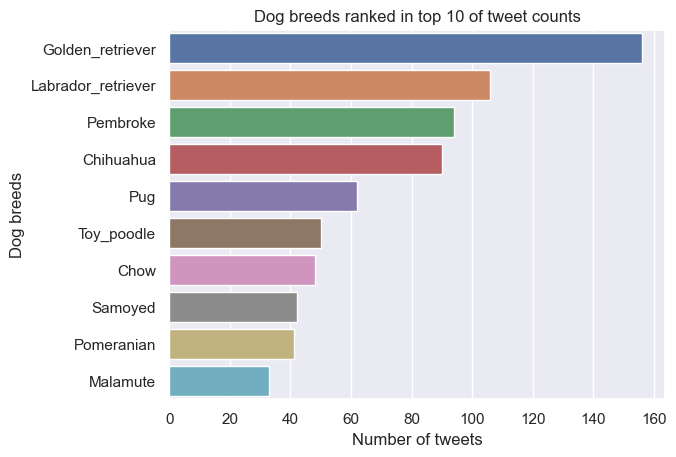

In [1116]:
# Plot dog breeds ranked in top 10
top_breed_tweet = dog_breed_count.sort_values(by='tweet_count', ascending=False)[:10]

sns.barplot(x='tweet_count', y='dog_breed', data=top_breed_tweet)
plt.title("Dog breeds ranked in top 10 of tweet counts")
plt.xlabel("Number of tweets")
plt.ylabel("Dog breeds")
plt.show()

The above plot shows that both golden and labrador retreievers occupy around 15% and draw more attentions than other breeds. Below, we keep track of the above dog breeds ranked in top 10 also in the bar plots of retweet and favorite counts.

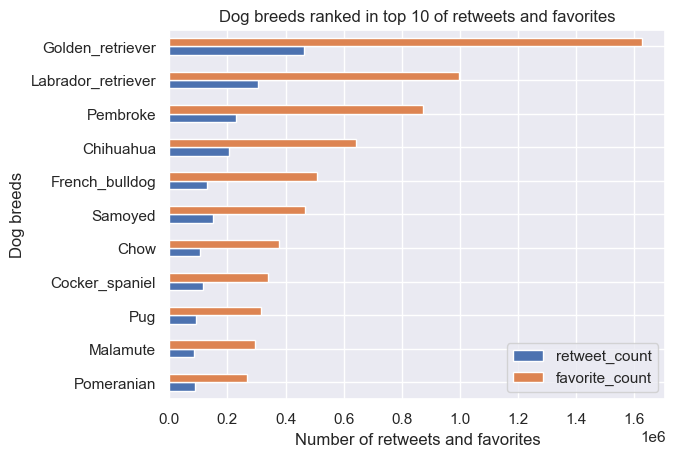

In [1128]:
# Plot the distribution of retweets and favorites
top_breed_count = dog_breed_count.sort_values(by='citation', ascending=False)
top_breed_count[10::-1].plot(x='dog_breed', y=['retweet_count', 'favorite_count'], kind='barh')
plt.title("Dog breeds ranked in top 10 of retweets and favorites")
plt.xlabel("Number of retweets and favorites")
plt.ylabel("Dog breeds")
plt.show()

In this horizontal bar plot, the dog breeds in the vertical axis are aligned in the descending order of the ranking with respect to the sum of retweets and favorites. This order matches the descending order only in terms of the favorites. As in the previous analysis, both **Golden_retriever** and **Labrador retriever** occupy the first and second ranks, respectively by receiving 2089255 and 1298874 citations. In other words, these two dog breeds are the most and second most popular among the dog breeds rated by WeRateDogs. We observe that most dog breeds wigh a high volume of favorites tend to get a large number of retweets. Still, as for the retweet counts, this tendency does not hold. For example, **French bulldog** has fewer retweets than **Samoyed**. Moreover, **Chow** has fewer retweets than **Cocker spaniel**.

### 3. Statistics of rating scores
- We observe how the rating scores are distributed.

In [1141]:
df.rating.value_counts()

1.200000    424
1.100000    359
1.000000    359
1.300000    222
0.900000    133
0.800000    70 
0.700000    30 
1.400000    22 
0.600000    16 
0.500000    12 
0.400000    6  
0.300000    5  
0.200000    2  
2.700000    1  
3.428571    1  
0.000000    1  
2.600000    1  
7.500000    1  
Name: rating, dtype: int64

In [1131]:
df.rating.describe()

count    1665.000000
mean     1.090047   
std      0.249311   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      7.500000   
Name: rating, dtype: float64

We note that the mean value of the rating scores is about 1.1 and the 25% percentile gets already 1.00. In other words, most dogs are given high scores and generously evaluated.

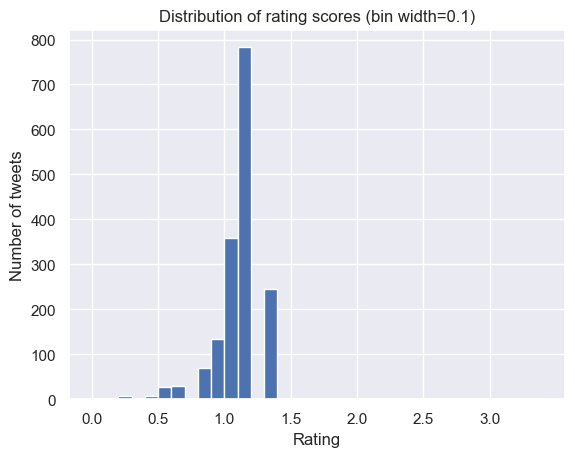

In [1140]:
# Distribution of the rating scores
plt.xticks(np.arange(0, 3.5, 0.5))
plt.xlabel("Rating")
plt.ylabel("Number of tweets")
plt.title("Distribution of rating scores (bin width=0.1)")
plt.hist(df.rating, bins=np.arange(0, 3.5, 0.1));

The above histogram shows the distribution of rating scores with the bin width being equal to 0.1. We observe that 68% of dogs fit into the range between 0.9 and 1.2.


### 4. Status of use of Twitter
- The column "url" shows how tweets were submitted. 

In [1145]:
df.url.value_counts()

http://twitter.com/download/iphone              1634
http://twitter.com                              22  
https://about.twitter.com/products/tweetdeck    9   
Name: url, dtype: int64

In [846]:
df.url.value_counts(normalize=True)

http://twitter.com/download/iphone              0.981381
http://twitter.com                              0.013213
https://about.twitter.com/products/tweetdeck    0.005405
Name: url, dtype: float64

The above result shows that 98% of tweets were sent via iPhone whereas only 1.3% and 0.5% wrote tweets via online edition and TweetDeck (an official online application).